In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/drive/My Drive/git_code/final_merged_dataset.csv')

In [ ]:
df

,Date,Year,Month,Day,Precipitation,Temp Max,Temp Min,streamflow (Mean)
0,1/31/2001,2001,1,31,128.757,24.706129,10.385806,21.0700
1,2/28/2001,2001,2,28,82.173,22.654286,10.073214,20.7600
2,3/31/2001,2001,3,31,64.114,21.950000,9.498387,20.4500
3,4/30/2001,2001,4,30,75.216,18.462333,7.417333,36.4100
4,5/31/2001,2001,5,31,16.696,17.470645,3.625484,23.5900
...,...,...,...,...,...,...,...,...
199,8/31/2017,2017,8,31,4.902,16.867742,0.268065,0.0300
200,9/30/2017,2017,9,30,24.321,23.235333,6.365667,0.0000
201,10/31/2017,2017,10,31,65.378,21.730645,6.322903,15.2363
202,11/30/2017,2017,11,30,37.836,22.931000,8.734333,37.2676


In [ ]:
df.columns = df.columns.str.strip() # remove white spaces

# check column names before renaming
print("columns before renaming")
print(df.columns.tolist())

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 'Year', 'Month', 'Day' columns have already been processed in a previous execution,
# so the following lines that attempt to combine them and then drop them are removed.
# df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
# df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# strip extra spaces from columns names (redundant after initial strip if no new cols)
df.columns = df.columns.str.strip()

# Rename columns for clarity
df.rename(columns={
    'Precipitation' : 'P(t)',
    'Temp Max' : 'T_max(t)', # Already renamed
    'Temp Min' : 'T_min(t)', # Already renamed
    'Temp Avg' : 'T_avg(t)', # Column does not exist
    'streamflow (Mean)' : 'Q(t)' # Already renamed
    }, inplace=True)

# check column names after renaming
print("\n")
print("columns after renaming")
print(df.columns.tolist())

columns before renaming
['Date', 'Year', 'Month', 'Day', 'P(t)', 'Temp Max', 'Temp Min', 'streamflow (Mean)']


columns after renaming
['Date', 'Year', 'Month', 'Day', 'P(t)', 'T_max(t)', 'T_min(t)', 'Q(t)']


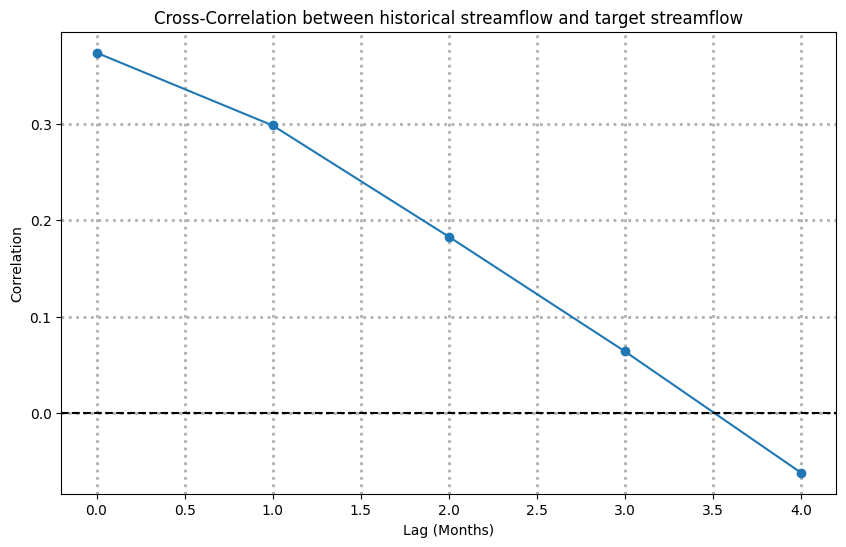

In [ ]:
# Cross Correlation Analysis for Precipitation using Option 2
import matplotlib.pyplot as plt
import numpy as np

# retrive the datasets
streamflow = df['Q(t)']
predictor = df['P(t)']

# apply z normalization to the data for comparison
streamflow_norm = (streamflow - streamflow.mean()) / streamflow.std()
predictor_norm = (predictor - predictor.mean()) / predictor.std()

# define a range of lags
lags = np.arange(0,5)

# compute cross-correlation
cross_corr = [streamflow_norm.corr(predictor_norm.shift(lag)) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr, marker='o')
plt.title('Cross-Correlation between historical streamflow and target streamflow')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.axhline(0, color='black', linestyle='--')
plt.grid(ls=':',lw='2')
plt.show()

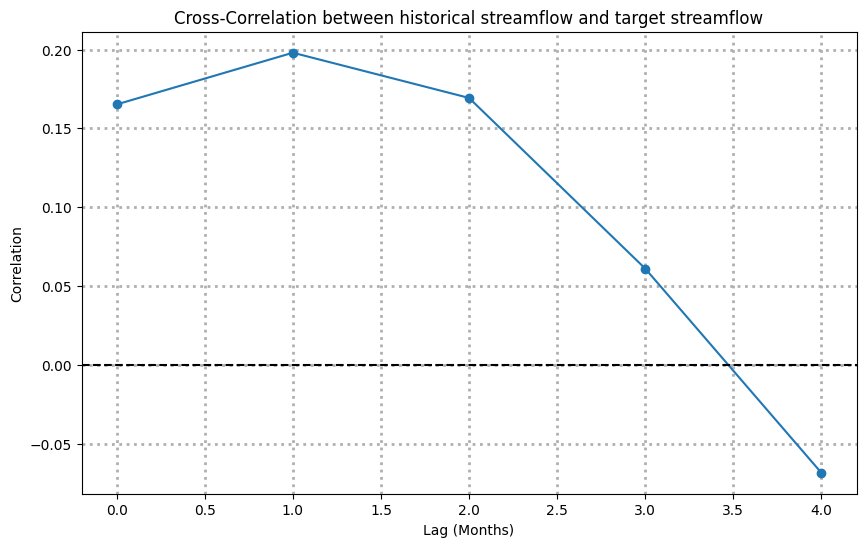

In [ ]:
# Cross Correlation Analysis for Precipitation using Option 2
import matplotlib.pyplot as plt
import numpy as np

# retrive the datasets
streamflow = df['Q(t)']
predictor = df['T_max(t)']

# apply z normalization to the data for comparison
streamflow_norm = (streamflow - streamflow.mean()) / streamflow.std()
predictor_norm = (predictor - predictor.mean()) / predictor.std()

# define a range of lags
lags = np.arange(0,5)

# compute cross-correlation
cross_corr = [streamflow_norm.corr(predictor_norm.shift(lag)) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr, marker='o')
plt.title('Cross-Correlation between historical streamflow and target streamflow')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.axhline(0, color='black', linestyle='--')
plt.grid(ls=':',lw='2')
plt.show()

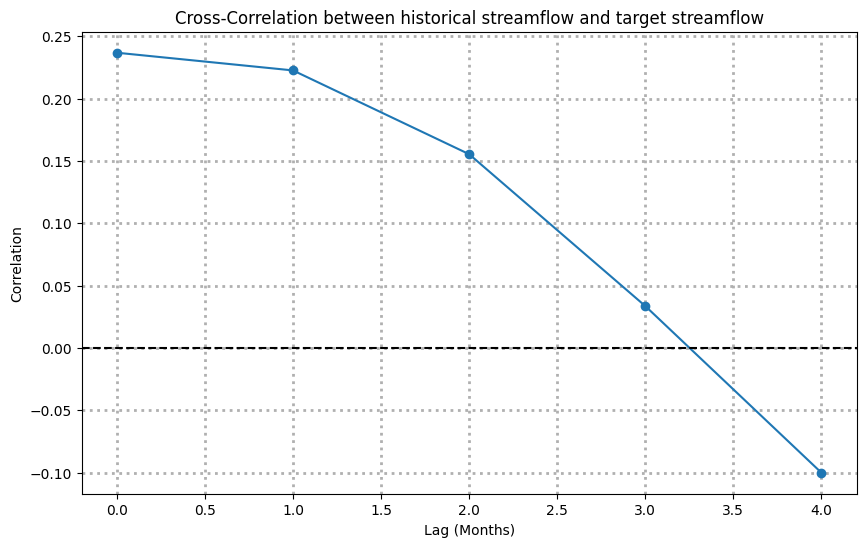

In [ ]:
# Cross Correlation Analysis for Precipitation using Option 2
import matplotlib.pyplot as plt
import numpy as np

# retrive the datasets
streamflow = df['Q(t)']
predictor = df['T_min(t)']

# apply z normalization to the data for comparison
streamflow_norm = (streamflow - streamflow.mean()) / streamflow.std()
predictor_norm = (predictor - predictor.mean()) / predictor.std()

# define a range of lags
lags = np.arange(0,5)

# compute cross-correlation
cross_corr = [streamflow_norm.corr(predictor_norm.shift(lag)) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr, marker='o')
plt.title('Cross-Correlation between historical streamflow and target streamflow')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.axhline(0, color='black', linestyle='--')
plt.grid(ls=':',lw='2')
plt.show()

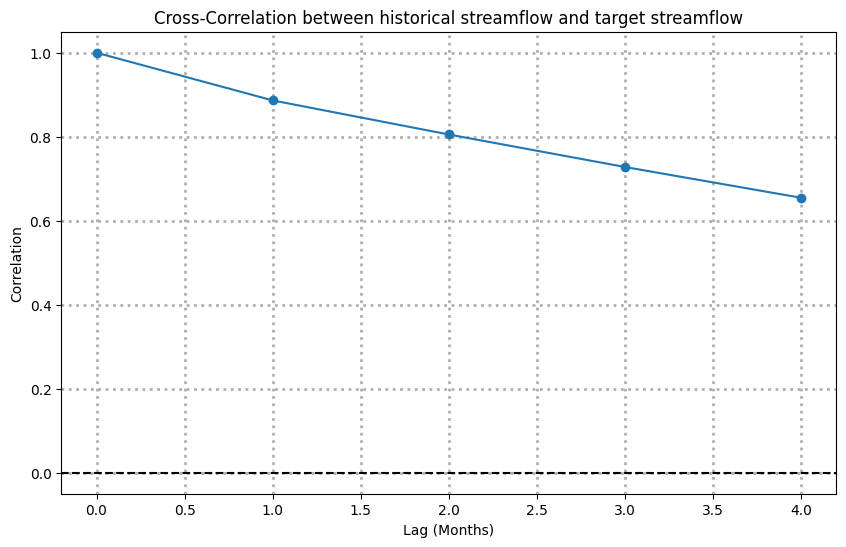

In [ ]:
# Cross Correlation Analysis for Precipitation using Option 2
import matplotlib.pyplot as plt
import numpy as np

# retrive the datasets
streamflow = df['Q(t)']
predictor = df['Q(t)']

# apply z normalization to the data for comparison
streamflow_norm = (streamflow - streamflow.mean()) / streamflow.std()
predictor_norm = (predictor - predictor.mean()) / predictor.std()

# define a range of lags
lags = np.arange(0,5)

# compute cross-correlation
cross_corr = [streamflow_norm.corr(predictor_norm.shift(lag)) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr, marker='o')
plt.title('Cross-Correlation between historical streamflow and target streamflow')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.axhline(0, color='black', linestyle='--')
plt.grid(ls=':',lw='2')
plt.show()